In [1]:
import numpy as np
from tqdm import tqdm

from src.distributions import Bernoulli

from src.mab.ucb import UCB
from src.mab.eps_greedy import EpsGreedy
from src.mab.thompson import ThompsonBernoulli
from src.mab.kl_ucb import KLUCB


%load_ext autoreload
%autoreload 2

In [2]:
arms = [
    Bernoulli(0.5),
    Bernoulli(0.6),
]

T = 10000
t = 1 + np.arange(T)

In [3]:
ucbs = []

for i in tqdm(range(10)):
    # ucb algorithm
    ucb = UCB(c=1, arms=arms)
    ucbs.append(ucb.play(T=T))
    
mean_ucbs = np.mean(ucbs, axis=0)

100%|██████████| 10/10 [00:01<00:00,  6.92it/s]


In [4]:
epss = []

for i in tqdm(range(10)):
    eps_greedy = EpsGreedy(eps=0.1, arms=arms)
    epss.append(eps_greedy.play(T=T))
    
mean_epss = np.mean(epss, axis=0)

100%|██████████| 10/10 [00:00<00:00, 14.23it/s]


In [5]:
thomps = []

for i in tqdm(range(10)):
    thomp = ThompsonBernoulli(arms=arms)
    thomps.append(thomp.play(T=T))
    
mean_thompss = np.mean(thomps, axis=0)

100%|██████████| 10/10 [00:02<00:00,  3.41it/s]


In [6]:
klucbs = []

for i in tqdm(range(10)):
    klucb = KLUCB(c=0, arms=arms)
    klucbs.append(klucb.play(T=T))
    
mean_klucbs = np.mean(klucbs, axis=0)

100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


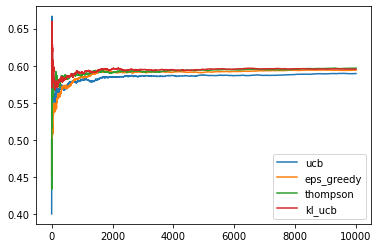

In [7]:
import matplotlib.pyplot as plt

plt.plot(mean_ucbs / t, label='ucb');
plt.plot(mean_epss / t, label='eps_greedy')
plt.plot(mean_thompss / t, label='thompson')
plt.plot(mean_klucbs / t, label='kl_ucb')
plt.legend()